## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?


#### Data Fields
- datetime : hourly date + timestamp  
- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday : whether the day is considered a holiday
- workingday : whether the day is neither a weekend nor holiday
- weather  
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : temperature in Celsius
- atemp : "feels like" temperature in Celsius
- humidity : relative humidity
- windspeed : wind speed
- casual : number of non-registered user rentals initiated
- registered : number of registered user rentals initiated
- count : number of total rentals


In [1]:
# 데이터 불러오기
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

In [2]:
# datatime 형식으로 변환
train['datetime']= pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


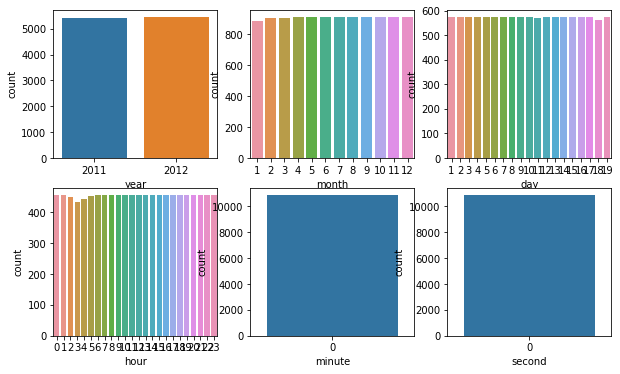

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2, 3, figsize=(10, 6))

sns.countplot(x='year', data=train, ax=ax[0, 0])
# ax[0,0].set_title('year')

sns.countplot(x='month', data=train, ax=ax[0, 1])
# ax[0,1].set_title('month')

sns.countplot(x='day', data=train, ax=ax[0, 2])
# ax[0,2].set_title('day')

sns.countplot(x='hour', data=train, ax=ax[1, 0])
# ax[1,0].set_title('hour')

sns.countplot(x='minute', data=train, ax=ax[1, 1])
# ax[1,1].set_title('minute')

sns.countplot(x='second', data=train, ax=ax[1, 2])
# ax[1,2].set_title('second')


plt.show()

### X 컬럼 선택

- datatime을 제외함  -> 수치가 아니었기때문
- casual, registered 제외
- year, minute, day 제외 -> count 그래프로 확인해보니 종류가 별로 없다


In [4]:
from sklearn.model_selection import train_test_split

X = train[['season', 'holiday','workingday', 'weather','temp','atemp','humidity','windspeed','month','day','hour']]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

array([296.34167172,   9.02951898, 240.00939083, ..., 270.02590256,
        -8.86390143, 205.30284922])

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

#### MSE : 21648.70612510245
#### RMSE : 147.1349928640446

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print(mse)
print(rmse)


21648.70612510245
147.1349928640446


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기


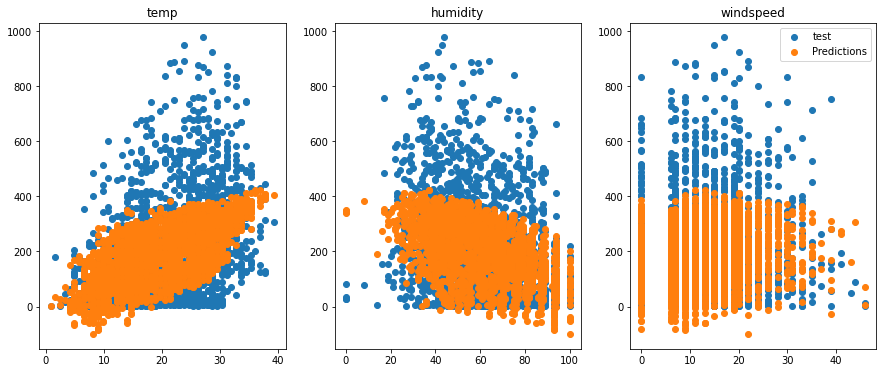

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].scatter(X_test['temp'], y_test, label = 'test')
axes[0].scatter(X_test['temp'], predictions, label = 'Predictions')
axes[0].set_title('temp')

axes[1].scatter(X_test['humidity'], y_test, label = 'test')
axes[1].scatter(X_test['humidity'], predictions, label = 'Predictions')
axes[1].set_title('humidity')

axes[2].scatter(X_test['windspeed'], y_test, label = 'test')
axes[2].scatter(X_test['windspeed'], predictions, label = 'Predictions')
axes[2].set_title('windspeed')

plt.legend()